In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Dataset loading and reading

In [4]:
fake_df = pd.read_csv("/content/Fake.csv")
true_df = pd.read_csv("/content/True.csv")


fake_df['label'] = 0
true_df['label'] = 1


df = pd.concat([fake_df, true_df]).sample(frac=1, random_state=42).reset_index(drop=True)


Preprocessing

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['text'] = (df['title'] + " " + df['text']).apply(clean_text)

World cloud for fakes vs real news

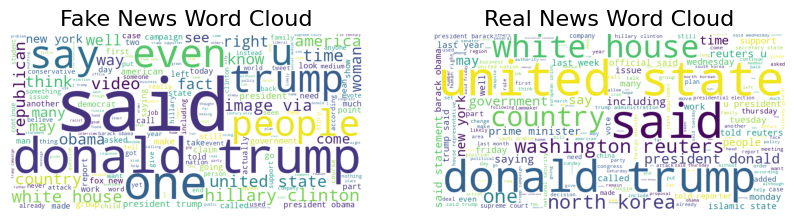

In [6]:
fake_text = ' '.join(df[df['label']==0]['text'])
real_text = ' '.join(df[df['label']==1]['text'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(fake_text))
plt.title("Fake News Word Cloud", fontsize=16)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(real_text))
plt.title("Real News Word Cloud", fontsize=16)
plt.axis('off')

plt.show()

Vectorizer

In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training Model**

1) Logitsic Regression

In [8]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

Support vector machine (linear SVC)

In [9]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)


Evaluation

In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("-"*50)

evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("SVM", y_test, svm_preds)


Model: Logistic Regression
Accuracy: 0.9860801781737194
F1-score: 0.9854363276243737
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

--------------------------------------------------
Model: SVM
Accuracy: 0.994097995545657
F1-score: 0.9938033438559569
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4710
           1       0.99      1.00      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

--------------------------------------------------


Accuracy Comparison Graph

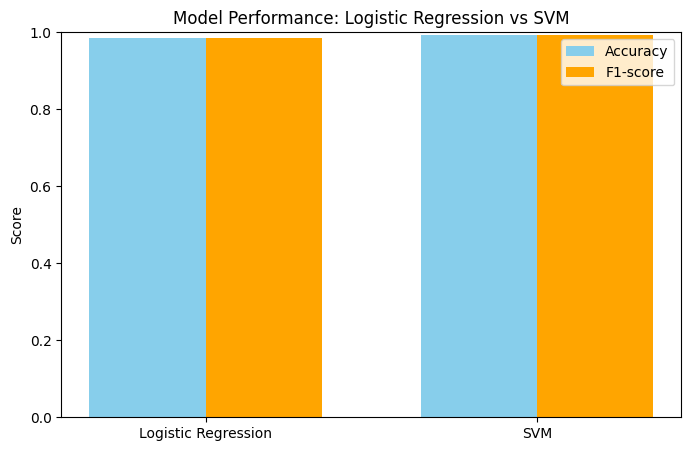

In [11]:

models = ['Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, lr_preds),
    accuracy_score(y_test, svm_preds)
]
f1_scores = [
    f1_score(y_test, lr_preds),
    f1_score(y_test, svm_preds)
]


plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy', color='skyblue')
plt.bar(x + bar_width/2, f1_scores, bar_width, label='F1-score', color='orange')

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance: Logistic Regression vs SVM")
plt.legend()
plt.show()
